In [1]:
import matplotlib
#matplotlib.use('qtagg')
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import scipy

from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

Notes_select = np.arange(383)
perflist = ['Demenga','Diaz','East','Enders','Gaillard1','Gaillard2','Geringas',
            'Haimovitz1','Haimovitz2','Helmerson','Kuijiken','LaMarca','Linden','Lipkind',
            'Mork','Narroway','Queyras','Rohmann','Tompkins','Viersen1','Viersen2',
            'Weilerstein','Wiseplwey']
perfcolors = ['k','blue','green','orange','red','yellowgreen','c','deeppink','lime','gold','springgreen',
              'violet','peru','silver','teal','magenta','orangered','mediumslateblue','hotpink','navy','gold',
             'cornflowerblue','darkgreen']


In [2]:
Notes_select.shape

(383,)

In [3]:
def df(beats, hfc):
    beats_df = pd.read_csv(beats,header=None,names=["time","value"])
    hfc_df = pd.read_csv(hfc,header=None,names=["time","value"])
    beats_df["beat_length"] =  beats_df.time.shift(-1)-beats_df.time
    
    npoints = 100
    dfs = []
    for i,row in beats_df.iloc[:-1].iterrows():
        l = row.beat_length
        s = row.time
        dfs.append(pd.DataFrame(dict(time=np.linspace(s,s+l,npoints),
                                     idx = range(npoints),
                                     beat_id = row.value)))
    
    new_df = pd.concat(dfs).reset_index(drop=True)
    f = scipy.interpolate.interp1d(hfc_df.time,hfc_df.value,kind="quadratic")
    new_df["value"] = f(new_df.time)
    x = new_df.pivot("idx","beat_id","value")
    #x = new_df
    
    return x

In [4]:
perflist = ['Demenga','Diaz','East','Enders','Gaillard1','Gaillard2','Geringas','Haimovitz1','Haimovitz2','Helmerson','Kuijiken','LaMarca','Linden','Lipkind','Mork','Narroway','Queyras','Rohmann','Tompkins','Viersen1','Viersen2','Weilerstein','Wispelwey']
#perflist = ['East','Kuijiken','Tompkins']
#perflist     = ['Demenga']
notelist     = np.arange(383)
numtimesteps = 100

# Create big array of notes #
Notes = np.full((0,numtimesteps),np.nan)    # initialize
Perfinds = np.full((0),np.nan)


for p in range(len(perflist)):              # collect notes from all performers
    # get data from performer #
    filename1 = '../Note markers/%s beats.csv' % ( perflist[p] )
    filename2 = '../HFC files/%s HFC.csv' % ( perflist[p] )
    y = df(filename1,filename2)
    z = y.to_numpy() # convert df to np array # #print(z) #print(z.shape)
    perf_array = z.transpose()[notelist,:] # transpose array to make [samples,features]  , i.e. [beatid,timeid]
    #print(perf_array.shape)

    # collect data
    Notes = np.concatenate([Notes,perf_array], axis=0)
    numnotes = perf_array.shape[0]
    
    # player indices #
    print('processing performer %g' % (p))
    Perfinds = np.concatenate([Perfinds,p * np.ones(numnotes)])
    

    #print(Notes.shape)
    # concatenate these arrays into a huge array [many samples, features] 
    #allArrays = np.stack((perf_array), axis=0)
    #Notes = np.concatenate((perf_array),axis=0)
       
#print(Notes.shape)
#print(Perfinds.shape)
# pca using scikit-learn #
    

processing performer 0
processing performer 1
processing performer 2
processing performer 3
processing performer 4
processing performer 5
processing performer 6
processing performer 7
processing performer 8
processing performer 9
processing performer 10
processing performer 11
processing performer 12
processing performer 13
processing performer 14
processing performer 15
processing performer 16
processing performer 17
processing performer 18
processing performer 19
processing performer 20
processing performer 21
processing performer 22


In [5]:
Perfinds.shape

(8809,)

In [6]:
#Scale vertical components (HFC data) across samples
Notes = StandardScaler().fit_transform(Notes.T).T
#print(Notes.shape)
#np.mean( Notes[5,:] )
#plt.figure()
#plt.plot( Notes[20,:] )

In [7]:
#Notes = MinMaxScaler().fit_transform(Notes.T).T
#print(Notes.shape)
#np.mean(Notes[5:1])
#plt.figure()
#plt.plot(Notes[20,:])

In [8]:
pca = PCA()
pca.fit(Notes)

PCA()

1.0000000000000004
1.0
1.0
0.9999999999999999
1.0


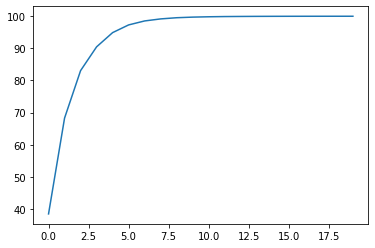

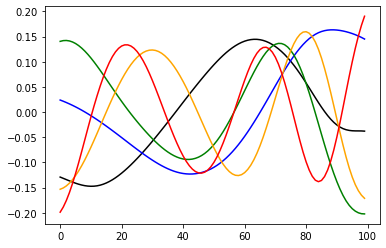

In [9]:
pca.explained_variance_ratio_*100
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_*100)[:20])
plt.figure()
colors = ['k','b','g','orange','red']
for comp in range(5):
    values = pca.components_[comp,:]
    magnitude = np.linalg.norm(values)
    plt.plot(values/magnitude ,color=colors[comp])
    print(magnitude)

In [10]:
print(pca.explained_variance_ratio_[:10]*100)

[38.46011519 29.83212004 14.7718559   7.40735958  4.42708057  2.39768018
  1.23693319  0.63188837  0.3685484   0.18754438]


1.0000000000000004
1.0


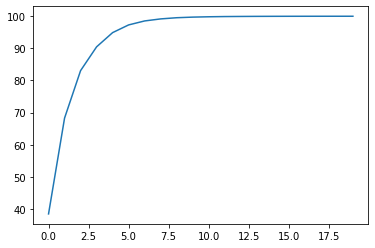

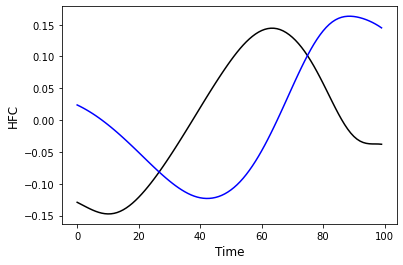

In [13]:
pca.explained_variance_ratio_*100
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_*100)[:20])
plt.figure()
colors = ['k','b','g','orange','red']
plt.xlabel('Time', fontsize=12)
plt.ylabel('HFC', fontsize=12)
for comp in range(2):
    values = pca.components_[comp,:]
    magnitude = np.linalg.norm(values)
    plt.plot(values/magnitude ,color=colors[comp])
    print(magnitude)

In [14]:
print(pca.explained_variance_ratio_[:10]*100)

[38.46011519 29.83212004 14.7718559   7.40735958  4.42708057  2.39768018
  1.23693319  0.63188837  0.3685484   0.18754438]


In [15]:
Notes_PCA = pca.transform(Notes)
print(Notes_PCA.shape)

(8809, 100)


Text(0, 0.5, 'PC2')

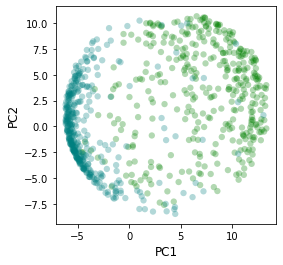

In [21]:
fig = plt.figure()
#ax = fig.add_subplot(projection='3d')
ax = fig.add_subplot()
for p in [2,14]:   #range(0,4):
    inds = Perfinds == p
    #ax.scatter(Notes_PCA[inds,0], Notes_PCA[inds,1], Notes_PCA[inds,2] , s=10, alpha = 0.5, edgecolors='None',facecolors=perfcolors[p])
    ax.scatter(Notes_PCA[inds,0], Notes_PCA[inds,1], s=40, alpha = 0.3, edgecolors='None',facecolors=perfcolors[p])
    #ax.scatter(Notes_PCA[inds,0], Notes_PCA[inds,4], s=25, alpha = 0.3, edgecolors='None',facecolors=perfcolors[p])
    ax.set_aspect('equal', 'box')
    plt.subplots_adjust(hspace=0)
plt.ion()
plt.isinteractive()
ax.set_xlabel('PC1', fontsize=12)
ax.set_ylabel('PC2', fontsize=12)
#ax.set_zlabel('PC3', fontsize=12)

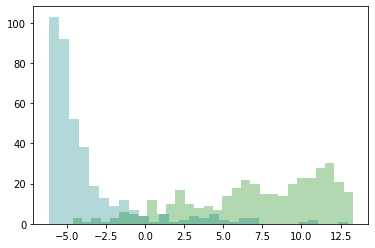

In [23]:
#np.histogram(Notes_PCA[:,0])
for pc in range(0,1):
    plt.figure()
    for p in [2,14]:
        inds = Perfinds == p
        plt.hist(Notes_PCA[inds, [pc]],bins=30,color=perfcolors[p],alpha=0.3)
#        N, bins = np.histogram(Notes_PCA[inds, [pc]])
#        ax.plot(np.random.rand(10))
plt.show()